In [1]:
# improting necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import warnings
warnings.filterwarnings('ignore')
# Import label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [2]:
# 1. Data Collection 
reviews_data = pd.read_csv('Cyberbullying_Dataset.csv')

In [3]:
print("Shape of the dataset:", reviews_data.shape)

reviews_data

Shape of the dataset: (2000, 2)


,Comments,Classes
0,123A commodity we trade is beet pulp so I aske...,NB
1,NaN,NB
2,A never opens all the way until he she is comp...,NB
3,A porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
...,...,...
1995,She was already linked. She doesn't care.,NB
1996,It seems that she doesn't care about facts.,NB
1997,That girl is hideous in every way.,B
1998,"I appreciate you bringing good content to me, ...",NB


In [4]:
# checking that is there any duplicated comments.
duplicated_comments = reviews_data.duplicated(subset = ['Comments'])
print("Total number of duplicated comments:", sum(duplicated_comments))

# displaying the duplicated comments...
print("Duplciated Comments in the dataset:")
reviews_data[duplicated_comments]

Total number of duplicated comments: 9
Duplciated Comments in the dataset:


,Comments,Classes
1991,Just saw her work from a few days ago. It's br...,NB
1992,The motive doesn't lessen the outcome.,NB
1993,Then I have no idea.,NB
1994,You could think of the worst possible idea eve...,NB
1995,She was already linked. She doesn't care.,NB
1996,It seems that she doesn't care about facts.,NB
1997,That girl is hideous in every way.,B
1998,"I appreciate you bringing good content to me, ...",NB
1999,Was your previous praise tactical or just misp...,NB


In [5]:
# dropping the duplicated comments from the dataset..
reviews_data_non_duplicated = reviews_data.drop_duplicates(subset = ['Comments'], keep = 'first')
print("Shape of reviews_data_non_duplicated:", reviews_data_non_duplicated.shape)
reviews_data_non_duplicated

Shape of reviews_data_non_duplicated: (1991, 2)


,Comments,Classes
0,123A commodity we trade is beet pulp so I aske...,NB
1,NaN,NB
2,A never opens all the way until he she is comp...,NB
3,A porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
...,...,...
1986,SOME women should not be behind the wheel of a...,B
1987,there are some things girls just shouldn't do,B
1988,It's very much a job for a lady,B
1989,I'm not sure if I should listen to a woman giv...,B


In [6]:
# is there any NULL comments (coment not geiven)
print("Number of Null/NaN values in dataset column:")
reviews_data_non_duplicated.isnull().sum()

Number of Null/NaN values in dataset column:


Comments    1
Classes     8
dtype: int64

In [7]:
# dropping the rows (records) which have Null/NaN vlaues inside.
reviews_data_cleaned = reviews_data_non_duplicated.dropna()
reviews_data_cleaned

,Comments,Classes
0,123A commodity we trade is beet pulp so I aske...,NB
2,A never opens all the way until he she is comp...,NB
3,A porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
5,about and how sweet she is to every single per...,NB
...,...,...
1986,SOME women should not be behind the wheel of a...,B
1987,there are some things girls just shouldn't do,B
1988,It's very much a job for a lady,B
1989,I'm not sure if I should listen to a woman giv...,B


In [8]:
# 2. Data Preparation.

# Task 1: Removing special characters (punctuation ) from comments
def remove_puncuation(txt):
    txt_nopunct = "".join([char for char in txt if char not in string.punctuation])
    return txt_nopunct


reviews_data_cleaned['Comments'] = reviews_data_cleaned['Comments'].apply(lambda x: remove_puncuation(x))
reviews_data_cleaned

,Comments,Classes
0,123A commodity we trade is beet pulp so I aske...,NB
2,A never opens all the way until he she is comp...,NB
3,A porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
5,about and how sweet she is to every single per...,NB
...,...,...
1986,SOME women should not be behind the wheel of a...,B
1987,there are some things girls just shouldnt do,B
1988,Its very much a job for a lady,B
1989,Im not sure if I should listen to a woman givi...,B


In [9]:
# Task 2: Removing digits (number) from comments
def remove_digits(txt):
    txt_nodigit = "".join([char for char in txt if not char.isdigit()])
    return txt_nodigit


reviews_data_cleaned['Comments'] = reviews_data_cleaned['Comments'].apply(lambda x: remove_digits(x))
reviews_data_cleaned

,Comments,Classes
0,A commodity we trade is beet pulp so I asked a...,NB
2,A never opens all the way until he she is comp...,NB
3,A porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
5,about and how sweet she is to every single per...,NB
...,...,...
1986,SOME women should not be behind the wheel of a...,B
1987,there are some things girls just shouldnt do,B
1988,Its very much a job for a lady,B
1989,Im not sure if I should listen to a woman givi...,B


In [10]:
# converting text into lower case...
reviews_data_cleaned['Comments'] = reviews_data_cleaned['Comments'].str.lower()
reviews_data_cleaned

,Comments,Classes
0,a commodity we trade is beet pulp so i asked a...,NB
2,a never opens all the way until he she is comp...,NB
3,a porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
5,about and how sweet she is to every single per...,NB
...,...,...
1986,some women should not be behind the wheel of a...,B
1987,there are some things girls just shouldnt do,B
1988,its very much a job for a lady,B
1989,im not sure if i should listen to a woman givi...,B


In order to remove commeon english words (stop_words)

stop_words{‘english’}, list, default=None
If a string, it is passed to _check_stop_list and the appropriate stop list is returned. ‘english’ is currently the only supported string value. There are several known issues with ‘english’ and you should consider an alternative (see Using stop words).

If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens. Only applies if analyzer == 'word'.

In [11]:
# converting classes into binary [0, 1] using Label Enconder
print("Unique values in 'Classes' column:", reviews_data_cleaned['Classes'].unique() )

classes_labels = {'NB':0, 'B':1}

reviews_data_cleaned['Classes_Labels'] = reviews_data_cleaned['Classes'].map(classes_labels)
reviews_data_cleaned

Unique values in 'Classes' column: ['NB' 'B']


,Comments,Classes,Classes_Labels
0,a commodity we trade is beet pulp so i asked a...,NB,0
2,a never opens all the way until he she is comp...,NB,0
3,a porn star who thinks she is better than an e...,NB,0
4,about and how sweet she is to every single per...,NB,0
5,about and how sweet she is to every single per...,NB,0
...,...,...,...
1986,some women should not be behind the wheel of a...,B,1
1987,there are some things girls just shouldnt do,B,1
1988,its very much a job for a lady,B,1
1989,im not sure if i should listen to a woman givi...,B,1


In [12]:
# Splitting the dataset into comments (features) and target (Classes)
user_reviews = reviews_data_cleaned.loc[:, 'Comments']  # getting comments
reviews_classes = reviews_data_cleaned.loc[:, ['Classes_Labels']]  # getting Classes

print("First Five user_reviews:\n", user_reviews.head(), "\n")
print("First Five reviews_classes:\n", reviews_classes.head())

First Five user_reviews:
 0    a commodity we trade is beet pulp so i asked a...
2    a never opens all the way until he she is comp...
3    a porn star who thinks she is better than an e...
4    about and how sweet she is to every single per...
5    about and how sweet she is to every single per...
Name: Comments, dtype: object 

First Five reviews_classes:
    Classes_Labels
0               0
2               0
3               0
4               0
5               0


In [13]:
print("Shape of the user_reviews:", user_reviews.shape )
print("Shae of the reviews_classes:", reviews_classes.shape )

Shape of the user_reviews: (1982,)
Shae of the reviews_classes: (1982, 1)


In [14]:
# Splitting the data into train and test set..
# 70% for training and 30% for testing..
train_review, test_review, train_label, test_label = train_test_split(user_reviews, reviews_classes, 
                                                                      test_size = 0.30, 
                                                                      random_state = 42)

In [15]:
print("Shape of train_review and train_label:", train_review.shape, train_label.shape)
print("Shape of test_review and label_test:", test_review.shape, test_label.shape)

Shape of train_review and train_label: (1387,) (1387, 1)
Shape of test_review and label_test: (595,) (595, 1)


In [16]:
print("First five train reviews and their labels:")
print(train_review[:5])
print(train_label[:5])

First five train reviews and their labels:
287     i was almost giving up but i wont please look ...
1806         sassy girls you arent sassy more like bitchy
723     remember who you are and what she is shes wrot...
1433    every time you text me my cheeks hurt i guess ...
783     she is nearly home one more day and steffy ret...
Name: Comments, dtype: object
      Classes_Labels
287                0
1806               1
723                0
1433               0
783                0


In [17]:
# Applying CountVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [19]:
# Fitting and transforming countvectorizer on train_reviews
train_review_vectors = tfidf_vectorizer.fit_transform(train_review)
print("Shape of Train_review_vectors:", train_review_vectors.shape)

Shape of Train_review_vectors: (1387, 3456)


In [48]:
# transforming only on test_reviews using count_vectorizer
test_review_vectors = tfidf_vectorizer.transform(test_review)
print("Shape of test_review_vectors:", test_review_vectors.shape)

Shape of test_review_vectors: (595, 3456)


### Classification Algorithms

##### 1) Multinomial Naive Bayes (MNB)-- Naive Bayes Algorithm

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
multi_nb_clf = MultinomialNB()

In [23]:
# training the model on train_set.
multi_nb_clf.fit(train_review_vectors.toarray(), train_label) # providing train_review_vectors and train_labels

MultinomialNB()

In [24]:
# prediction on test_review_vectors
predictions_multi_nb_clf = multi_nb_clf.predict(test_review_vectors.toarray())

In [25]:
# comparing the true_labels and predicted_labels
print("First five groud_truth labels of test_label:\n", test_label[:5])
print("First five Predicted:\n", predictions_multi_nb_clf[:5])

First five groud_truth labels of test_label:
       Classes_Labels
583                1
1968               1
1253               1
1103               0
925                0
First five Predicted:
 [1 0 1 0 0]


In [26]:
# Performnce Evaluation of Multinomial Nayes Bayes (MNB)
print("Performance Evaluation of Multinomial Nayes Bayes (MNB) Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_multi_nb_clf) )
multi_nb_clf_acc = accuracy_score(test_label, predictions_multi_nb_clf)*100.0
print("Accuracy:", multi_nb_clf_acc)

print("Classification Report:\n", 
      classification_report(test_label, predictions_multi_nb_clf, target_names = ["NB", "B"]))

Performance Evaluation of Multinomial Nayes Bayes (MNB) Algorithm:
Confusion Matrix:
 [[353   4]
 [105 133]]
Accuracy: 81.68067226890756
Classification Report:
               precision    recall  f1-score   support

          NB       0.77      0.99      0.87       357
           B       0.97      0.56      0.71       238

    accuracy                           0.82       595
   macro avg       0.87      0.77      0.79       595
weighted avg       0.85      0.82      0.80       595



##### 2) GaussianNB -Naive Bayes Algorithm

In [27]:
# GaussianNB is a type of Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

In [28]:
gau_nb_clf = GaussianNB()

In [29]:
# training the model on train_set.
gau_nb_clf.fit(train_review_vectors.toarray(), train_label) # providing train_review_vectors and train_labels

GaussianNB()

In [30]:
# prediction on test_review_vectors
predictions_gau_nb_clf = gau_nb_clf.predict(test_review_vectors.toarray())

In [51]:
# comparing the true_labels and predicted_labels
print("First five groud_truth labels of test_label:\n", test_label[:5])
print("First five Predicted:\n", predictions_gau_nb_clf[:5])

First five groud_truth labels of test_label:
       Classes_Labels
583                1
1968               1
1253               1
1103               0
925                0
First five Predicted:
 [1 0 1 0 1]


In [52]:
# Performnce Evaluation of GaussianNB (GNB)
print("Performance Evaluation of GaussianNB (GNB) Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_multi_nb_clf) )

gau_nb_clf_acc = accuracy_score(test_label, predictions_gau_nb_clf)*100.0

print("Accuracy:", gau_nb_clf_acc )

print("Classification Report:\n", 
      classification_report(test_label, predictions_gau_nb_clf, target_names = ["NB", "B"]))

Performance Evaluation of GaussianNB (GNB) Algorithm:
Confusion Matrix:
 [[353   4]
 [105 133]]
Accuracy: 67.22689075630252
Classification Report:
               precision    recall  f1-score   support

          NB       0.78      0.64      0.70       357
           B       0.57      0.72      0.64       238

    accuracy                           0.67       595
   macro avg       0.67      0.68      0.67       595
weighted avg       0.69      0.67      0.68       595



##### 3) Decision Tree Classification Algorithm

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dec_tree_clf = DecisionTreeClassifier()

In [55]:
# training the model on train_set.
dec_tree_clf.fit(train_review_vectors.toarray(), train_label) # providing train_review_vectors and train_labels

DecisionTreeClassifier()

In [56]:
# prediction on test_review_vectors
predictions_dec_tree_clf = dec_tree_clf.predict(test_review_vectors.toarray())

In [57]:
# comparing the true_labels and predicted_labels
print("First five groud_truth labels of test_label:\n", test_label[:5])
print("First five Predicted:\n", predictions_dec_tree_clf[:5])

First five groud_truth labels of test_label:
       Classes_Labels
583                1
1968               1
1253               1
1103               0
925                0
First five Predicted:
 [1 1 0 0 1]


In [58]:
# Performnce Evaluation of Decision Tree
print("Performance Evaluation of Decision Tree Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_dec_tree_clf) )

dec_tree_clf_acc = accuracy_score(test_label, predictions_dec_tree_clf)*100.0

print("Accuracy:", dec_tree_clf_acc )

print("Classification Report:\n", 
      classification_report(test_label, predictions_dec_tree_clf, target_names = ["NB", "B"]))

Performance Evaluation of Decision Tree Algorithm:
Confusion Matrix:
 [[319  38]
 [ 54 184]]
Accuracy: 84.53781512605042
Classification Report:
               precision    recall  f1-score   support

          NB       0.86      0.89      0.87       357
           B       0.83      0.77      0.80       238

    accuracy                           0.85       595
   macro avg       0.84      0.83      0.84       595
weighted avg       0.84      0.85      0.84       595



##### 4) Random Forest Classification Algorithm

In [59]:
from sklearn.ensemble import  RandomForestClassifier

In [60]:
rand_for_clf = RandomForestClassifier(n_estimators = 200)

In [61]:
# training the model on train_set.
rand_for_clf.fit(train_review_vectors.toarray(), train_label) # providing train_review_vectors and train_labels

RandomForestClassifier(n_estimators=200)

In [62]:
# prediction on test_review_vectors
predictions_rand_for_clf = rand_for_clf.predict(test_review_vectors.toarray())

In [63]:
# comparing the true_labels and predicted_labels
print("First five groud_truth labels of test_label:\n", test_label[:5])
print("First five Predicted:\n", predictions_rand_for_clf[:5])

First five groud_truth labels of test_label:
       Classes_Labels
583                1
1968               1
1253               1
1103               0
925                0
First five Predicted:
 [1 1 1 0 0]


In [64]:
# Performnce Evaluation of Random Forest
print("Performance Evaluation of Random Forest (RF) Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_rand_for_clf) )

rand_for_clf_acc = accuracy_score(test_label, predictions_rand_for_clf)*100.0

print("Accuracy:", rand_for_clf_acc )

print("Classification Report:\n", 
      classification_report(test_label, predictions_rand_for_clf, target_names = ["NB", "B"]))

Performance Evaluation of Random Forest (RF) Algorithm:
Confusion Matrix:
 [[320  37]
 [ 26 212]]
Accuracy: 89.41176470588236
Classification Report:
               precision    recall  f1-score   support

          NB       0.92      0.90      0.91       357
           B       0.85      0.89      0.87       238

    accuracy                           0.89       595
   macro avg       0.89      0.89      0.89       595
weighted avg       0.90      0.89      0.89       595



In [65]:
# combining all algorithms accurices in one table.
all_algos_result = {
    'Multinomail NB Accuracy': multi_nb_clf_acc,
    'Gaussian NB Accuracy' : gau_nb_clf_acc,
    'Decision Tree Accuracy': dec_tree_clf_acc,
    'Random Forest Accuracy' : rand_for_clf_acc
}

In [66]:
print("Overall Accuracy of all classification algorithms:\n")
all_algos_result

Overall Accuracy of all classification algorithms:



{'Multinomail NB Accuracy': 81.68067226890756,
 'Gaussian NB Accuracy': 67.22689075630252,
 'Decision Tree Accuracy': 84.53781512605042,
 'Random Forest Accuracy': 89.41176470588236}

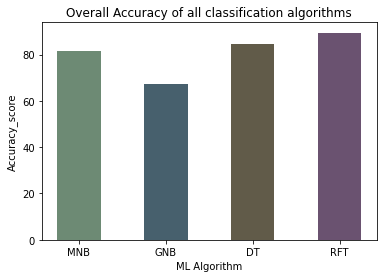

In [67]:
# display bar chart
plt.bar(['MNB'],[multi_nb_clf_acc], color="#6d8a74",width= 0.5)
plt.bar(['GNB'],[gau_nb_clf_acc], color="#47606d",width= 0.5)
plt.bar(['DT'],[dec_tree_clf_acc], color="#615b49",width= 0.5)
plt.bar(['RFT'],[rand_for_clf_acc], color="#6a5270",width= 0.5)
plt.xlabel("ML Algorithm")
plt.ylabel("Accuracy_score")
plt.title("Overall Accuracy of all classification algorithms")
plt.show()